# 실습 3. Visualization 
- 원본 출처 : https://github.com/zhiyzuo/python-tutorial/blob/master/4-Visualization-with-Matplotlib.ipynb
@author: Zhiya Zuo  
@email: zhiya-zuo@uiowa.edu

<hr>

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

<hr>

## 1. 산점도 그려보기

- 샘플 데이터를 생성합니다.

In [4]:
X_arr = np.arange(10)
Y_arr = 3*X_arr + 2 + np.random.random(size=X_arr.size) # linear with some noise
print(X_arr)
print(Y_arr)

[0 1 2 3 4 5 6 7 8 9]
[ 2.82793021  5.30516374  8.24954542 11.5489287  14.72768505 17.1919923
 20.41919336 23.12135315 26.49010331 29.5008243 ]


### Scater Plot
- `plt.scatter()` 함수를 이용하여 산점도를 그립니다.
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

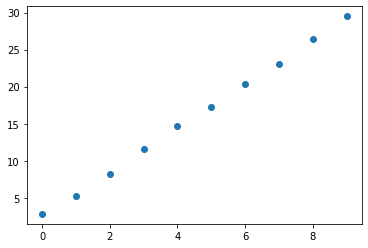

In [5]:
plt.scatter(X_arr, Y_arr)

- X, Y 축 레이블을 추가합니다.
- 산점도의 마커를 + 로 변경하고 그래프의 색상을 변경합니다.
- 그래프의 제목을 추가합니다.

Text(0.5, 1.0, 'My First Plot')

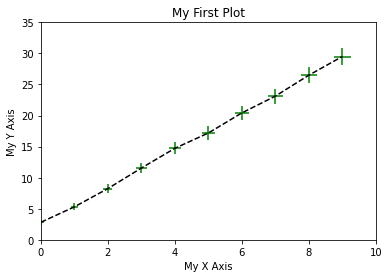

In [8]:
# Use `+` as marker; color set as `g` (green); size proportion to Y values
plt.scatter(X_arr, Y_arr, marker='+', c='g', s=Y_arr*10) 
# How about adding a line to it? Let's use `plt.plot()`
# set line style to dashed; color as `k` (black) 
plt.plot(X_arr, Y_arr, linestyle='dashed', color='k')
# set x/y axis limits: first two are xlow and xhigh; last two are ylow and yhigh
plt.axis([0, 10, 0, 35])
# set x/y labels
plt.xlabel('My X Axis')
plt.ylabel('My Y Axis')
# set title
plt.title('My First Plot')

### 그래프 요소 명칭 확인

아래 그림을 통해 `matplotlib`에서 사용하는 그래프 구성요소의 이름을 확인하세요.

<img width=700 src="https://matplotlib.org/_images/anatomy1.png">

---

## 2. 코딩 스타일 연습 

- `figure` 오브젝트의 생성에서부터 단계적으로 구성요소를 추가하는 방식을 추천합니다. 

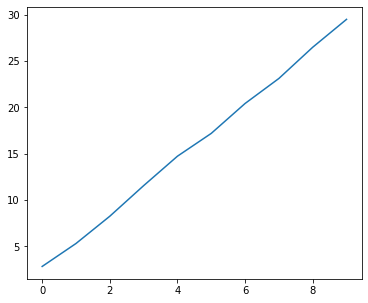

In [10]:
# `plt.subplots()` returns a figure object (which is the whole thing as shown above)
# and `axes` that control specific plots in the figure.
# Here our "subplots" layout is by default 1 row and 1 col and therefore 1 plot
fig, ax = plt.subplots()
# Setting figure size
fig.set_figwidth(6)
fig.set_figheight(5)
# plot should be done on the `axis`: ax
ax.plot(X_arr, Y_arr)
plt.show()

- 산점도의 예제에서와 마찬가지로 축과 마커 등을 추가합니다.

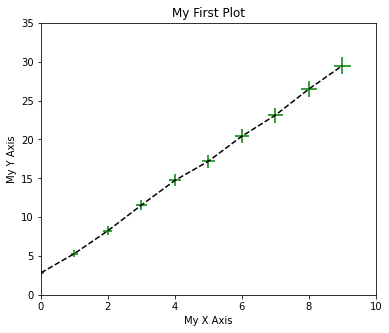

In [9]:
fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(5)
# What we just did, applying to `ax`
ax.scatter(X_arr, Y_arr, marker='+', c='g', s=Y_arr*10) 
ax.plot(X_arr, Y_arr, linestyle='dashed', color='k')
ax.axis([0, 10, 0, 35])
ax.set_xlabel('My X Axis')
ax.set_ylabel('My Y Axis')
ax.set_title('My First Plot')
plt.show()

### Subplots
- `subplots`를 이용하여 멀티 그래프를 그리는 방식은 매우 자주 사용됩니다.
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
- 아래는 (2,3)차원의 서브플롯 구성 예제입니다.

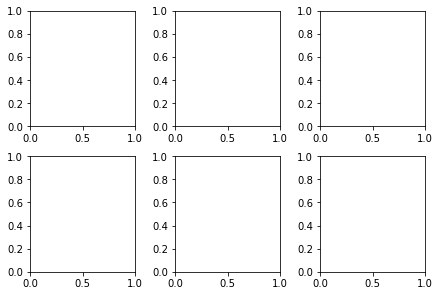

In [43]:
# Now the returned `ax` would be array with a shape a 2x3
fig, ax_arr = plt.subplots(nrows=2, ncols=3, constrained_layout=True)
ax_arr.shape
plt.show()

- `for`반복문을 통해 각 `axes`에 `plot`함수를 호출하고 그래프를 그릴 수 있습니다. 

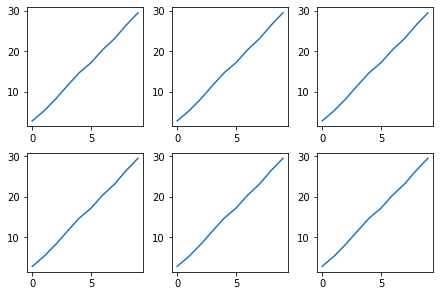

In [45]:
# Now the returned `ax` would be array with a shape a 2x3
fig, ax_arr = plt.subplots(nrows=2, ncols=3, constrained_layout=True)
for ax_row in ax_arr:
    for ax in ax_row:
        ax.plot(X_arr, Y_arr)

- `subplots`호출시 첫번째 리턴값은 그래프가 표시될 캔바스이고, 두번째 리턴값은 서브그래프 콤포넌트입니다.

In [31]:
ax_arr

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

### Subplot
- 다양한 코딩 방식이 가능합니다. 다음은 `subplots`가 아닌 `subplot`을 사용하는 예제입니다.
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
- `subplot`을 사용할 경우 index를 이용하여 제어합니다.  
```
   index는 1부터 시작하며, 만약 (2,3) 차원의 서브플롯 배치라면,  
   (2,3,1), (2,3,2), (2,3,3)  
   (2,3,4), (2,3,5), (2,3,6)  
   과 같은 순서로 index가 지정됩니다.
```

In [36]:
Y_triple = [Y_arr, Y_arr*2, Y_arr*3]
Y_triple

[array([ 2.82793021,  5.30516374,  8.24954542, 11.5489287 , 14.72768505,
        17.1919923 , 20.41919336, 23.12135315, 26.49010331, 29.5008243 ]),
 array([ 5.65586042, 10.61032749, 16.49909084, 23.0978574 , 29.4553701 ,
        34.3839846 , 40.83838672, 46.24270631, 52.98020662, 59.0016486 ]),
 array([ 8.48379064, 15.91549123, 24.74863625, 34.6467861 , 44.18305515,
        51.57597691, 61.25758008, 69.36405946, 79.47030994, 88.50247289])]

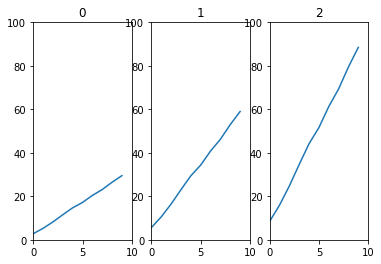

In [40]:
for index, y in enumerate(Y_triple):
    plt.subplot(1,3,index+1)
    plt.plot(y)
    plt.axis([0, 10, 0, 100])
    plt.title(index)

---

## 3. 다양한 그래프 활용하기

### Histogram

- Gaussian distribution for illustration

In [41]:
mu, sigma = 15, 1
gaussian_arr = np.random.normal(mu, sigma, size=10000)
np.mean(gaussian_arr), np.std(gaussian_arr, ddof=1)

(15.002753474239787, 0.9948719967809957)

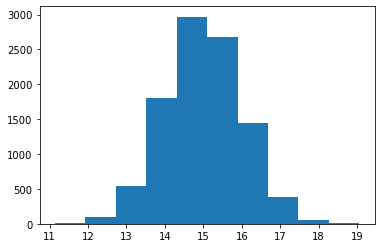

In [42]:
fig, ax = plt.subplots()
# `hist()` will return something but we usually do not need.
freq_arr, bin_arr, _ = ax.hist(gaussian_arr)

- 색상, 투명도, 그리드 등을 조절할 수 있습니다.

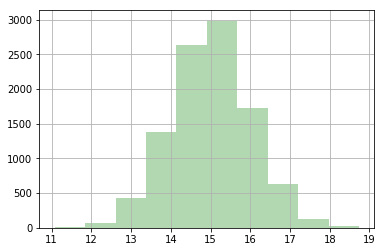

In [119]:
fig, ax = plt.subplots()
# Facecolor set to green; transparency (`alpha`) level: 30%
freq_arr, bin_arr, _ = ax.hist(gaussian_arr, facecolor='g', alpha=0.3)
# Add grid
ax.grid()

### Boxplot

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html?highlight=boxplot#matplotlib.pyplot.boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8246d23668>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8246d23be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8246d23400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f824717c1d0>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x7f824717c4a8>]}

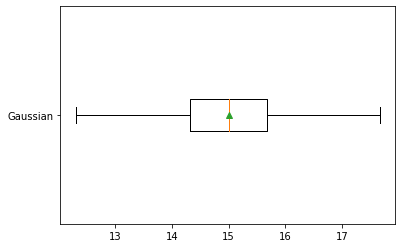

In [46]:
fig, ax = plt.subplots()
ax.boxplot(gaussian_arr, 
           vert=False,  # verticle
           showfliers=False, # do not show outliers
           showmeans=True, # show the mean
           labels=['Gaussian'] # group name (label)
          )

### Bar chart

- 랜덤 데이터를 사용하겠습니다. 

In [48]:
bar_arr = np.array(['Spring', 'Summer', 'Fall', 'Winder'])
freq_arr = np.random.randint(0, 100, 4) # generate 4 random integers for bar chart
freq_arr

array([ 5, 32, 24, 78])

<BarContainer object of 4 artists>

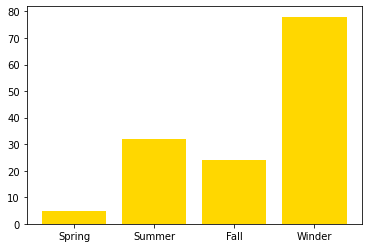

In [49]:
fig, ax = plt.subplots()
ax.bar(bar_arr, freq_arr, # X and Y
       color='gold',
      )

---

## 3. Seaborn

- https://seaborn.pydata.org/
- Matplotlib과 함께 매우 많이 사용되는 시각화 라이브러리입니다.

In [50]:
import seaborn as sns

### Example 1: Heatmap

- `iris` 데이터셋을 사용하겠습니다.

In [51]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- correlation 값을 계산합니다.

In [127]:
corr_df = df[df.columns[:3]].corr()
corr_df

,sepal_length,sepal_width,petal_length
sepal_length,1.000000,-0.11757,0.871754
sepal_width,-0.117570,1.00000,-0.428440
petal_length,0.871754,-0.42844,1.000000


- `seaborn` 을 이용하여 correlation 그래프를 그립니다. 

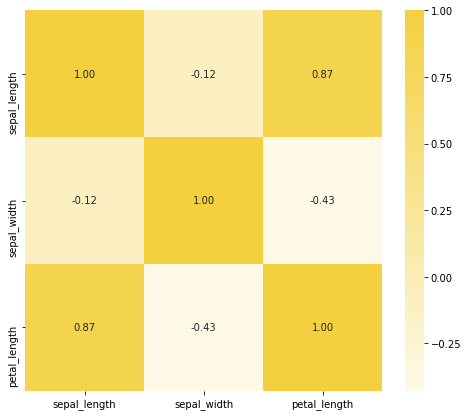

In [128]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(7)
sns.heatmap(corr_df, 
            annot=True, # show the values
            fmt=".2f", # format of the value
            cmap=sns.light_palette("#F4D03F", as_cmap=True), # color map to be used 
            ax=ax # plot on the `ax` we just instaniated
           )

### Example 2: Linear regression

- `lmplot`함수를 이용하여 동일한 iris데이터셋을 이용하여 산점도를 그리고 추세선을 추가합니다. 
- https://seaborn.pydata.org/generated/seaborn.lmplot.html


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


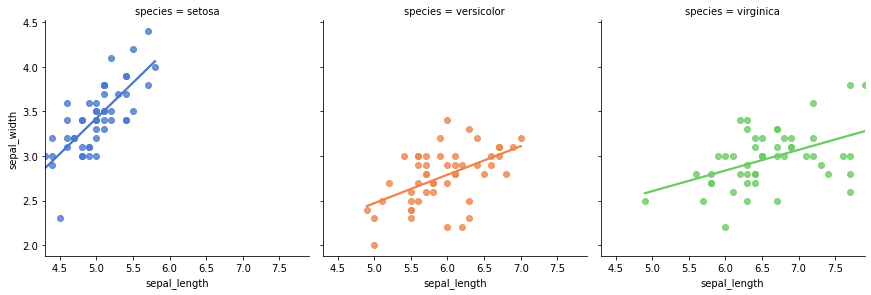

In [57]:
sns.lmplot(x="sepal_length", y="sepal_width", 
           data=df, # the data to be used
           col="species", # seperate data into column based on `species`
           hue="species", # color for each subplot (facet)
           col_wrap=3, # wrap into a new row for every 2 columns
           ci=None, # do not show confidence interval
           palette="muted", # color palette to use
           size=4, # size of each subplot (facet)
          )

---

#### 추가 참고자료 

아래 링크를 함께 참고하십시오. 또는 상황별 인터넷 검색을 통해 목적에 맞는 다양한 예제를 찾을 수 있습니다.

- https://matplotlib.org/users/pyplot_tutorial.html
- https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure
- https://seaborn.pydata.org/examples/index.html